<a href="https://colab.research.google.com/github/wimero72/challenge1-data-science-latam/blob/main/Challege1_data_science_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos
### importamos las librerias Pandas para manipular los datos de los archivos CSV y Mathplotlib.pyplot para las graficas

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
#import locale

# Establecer el locale a CO o COP para el formato de moneda en pesos Colombianos
#l·ocale.setlocale(locale.LC_ALL, 'es_CO')

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
# Leemos los archivo CSV en los DataFrame tienda1, tienda2, tienda3, tienda4
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


# Verificamos la estructura de los datos de cada DataFrame que se encuentre en optimas condiciones para hacer el analisis

# Obtén el número de filas y columnas
filas, columnas = tienda1.shape

# Imprime los resultados
print("Número de filas:", filas)
print("Número de columnas:", columnas)

tienda1.head(10)

Número de filas: 2359
Número de columnas: 12


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175


In [8]:
# Obtén el número de filas y columnas
filas, columnas = tienda2.shape

# Imprime los resultados
print("Número de filas:", filas)
print("Número de columnas:", columnas)

tienda2.head(10)

Número de filas: 2359
Número de columnas: 12


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
5,Guitarra acústica,Instrumentos musicales,298400.0,16100.0,10/09/2021,Beatriz Morales,Leticia,5,Tarjeta de crédito,3,-4.21528,-69.94056
6,Mochila,Deportes y diversión,105900.0,9000.0,10/06/2020,Blanca Ramirez,Bogotá,1,Cupón,1,4.60971,-74.08175
7,Tablet ABXY,Electrónicos,962600.0,49400.0,12/04/2022,Juliana Costa,Medellín,4,Nequi,1,6.25184,-75.56359
8,Olla de presión,Artículos para el hogar,82800.0,4800.0,11/04/2022,Izabela de León,Barranquilla,5,Nequi,1,10.96854,-74.78132
9,Cubo mágico 8x8,Juguetes,9100.0,3800.0,04/09/2021,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175


In [10]:
# Obtén el número de filas y columnas
filas, columnas = tienda3.shape

# Imprime los resultados
print("Número de filas:", filas)
print("Número de columnas:", columnas)

tienda3.head(10)

Número de filas: 2359
Número de columnas: 12


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175
5,Impresora,Electrónicos,230700.0,10500.0,20/11/2022,Mariana Herrera,Medellín,5,Tarjeta de crédito,5,6.25184,-75.56359
6,Carrito de control remoto,Juguetes,55700.0,3200.0,07/07/2020,Ángel Rodriguez,Bogotá,2,Nequi,1,4.60971,-74.08175
7,Silla de oficina,Muebles,464600.0,25100.0,01/05/2022,Santiago Silva,Bogotá,5,Nequi,1,4.60971,-74.08175
8,Pandereta,Instrumentos musicales,43500.0,2700.0,27/10/2021,Maria Alfonso,Medellín,5,Tarjeta de crédito,3,6.25184,-75.56359
9,Cubertería,Artículos para el hogar,33500.0,0.0,03/05/2022,Felipe Santos,Medellín,5,Nequi,1,6.25184,-75.56359


In [11]:
# Obtén el número de filas y columnas
filas, columnas = tienda4.shape

# Imprime los resultados
print("Número de filas:", filas)
print("Número de columnas:", columnas)

tienda4.head(10)

Número de filas: 2358
Número de columnas: 12


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175
5,Refrigerador,Electrodomésticos,1591900.0,83000.0,30/05/2020,Beatriz Morales,Cartagena,1,Tarjeta de crédito,10,10.39972,-75.51444
6,Guitarra eléctrica,Instrumentos musicales,626200.0,38000.0,11/07/2021,Izabela de León,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
7,Auriculares con micrófono,Electrónicos,94500.0,11900.0,19/02/2022,Santiago Silva,Medellín,4,Tarjeta de crédito,2,6.25184,-75.56359
8,Iphone 15,Electrónicos,2339000.0,122700.0,15/10/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
9,Mesa de noche,Muebles,273300.0,21900.0,18/11/2022,Rafael Acosta,Bogotá,1,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [22]:
facturacion_tienda1 = tienda1["Precio"].sum()
facturacion_tienda2 = tienda2["Precio"].sum()
facturacion_tienda3 = tienda3["Precio"].sum()
facturacion_tienda4 = tienda4["Precio"].sum()

print("Facturacion Tienda 1:", f"${facturacion_tienda1:,.2f}")
print("Facturacion Tienda 2:", f"${facturacion_tienda2:,.2f}")
print("Facturacion Tienda 3:", f"${facturacion_tienda3:,.2f}")
print("Facturacion Tienda 4:", f"${facturacion_tienda4:,.2f}")

Facturacion Tienda 1: $1,150,880,400.00
Facturacion Tienda 2: $1,116,343,500.00
Facturacion Tienda 3: $1,098,019,600.00
Facturacion Tienda 4: $1,038,375,700.00


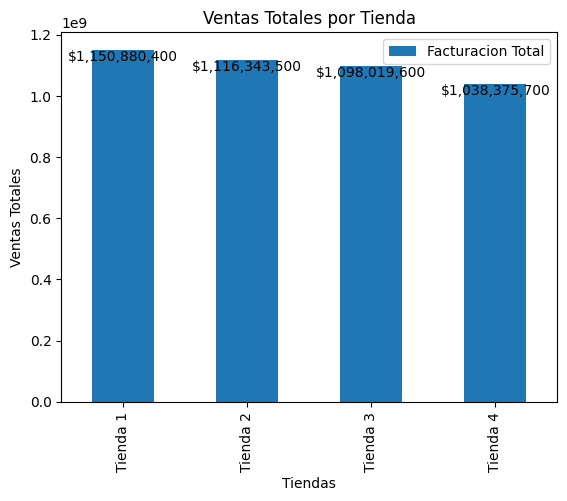

In [78]:
datos_ventas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Facturacion Total": [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
})

barras = datos_ventas.plot.bar(x="Tienda", y="Facturacion Total")

# Agrego valores a las barras
for barra, valor in enumerate(datos_ventas["Facturacion Total"]):
    barras.text(barra, valor, str(f"${valor:,.0f}"), ha='center', va='top')
# Configuro el grafico
plt.xlabel("Tiendas")
plt.ylabel("Ventas Totales")
plt.title("Ventas Totales por Tienda")
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda